In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data= pd.read_excel(r"C:\Users\Tejes\Downloads\Dataset_w6.xlsx")
data.head(10)

,country,Region,Surface area (km2),Population in thousands (2017),GDP per capita (current US$),Agricultural production index,International trade: Imports (million US$)
0,Afghanistan,SouthernAsia,652864.0,35530.0,623.2,125.0,3568.0
1,Albania,SouthernEurope,28748.0,2930.0,3984.2,134.0,4669.0
2,Algeria,NorthernAfrica,2381741.0,41318.0,4154.1,160.0,47091.0
3,Angola,MiddleAfrica,1246700.0,29784.0,4714.1,175.0,8790.0
4,Antigua and Barbuda,Caribbean,442.0,102.0,14764.5,88.0,491.0
5,Argentina,SouthAmerica,2780400.0,44271.0,14564.5,119.0,55610.0
6,Armenia,WesternAsia,29743.0,2930.0,3489.1,135.0,3230.0
7,Australia,Oceania,7692060.0,24451.0,51352.2,111.0,189406.0
8,Austria,WesternEurope,83871.0,8736.0,44117.7,108.0,149299.0
9,Azerbaijan,WesternAsia,86600.0,9828.0,5438.7,131.0,8532.0


In [6]:
data.columns

Index(['country', 'Region', 'Surface area (km2)',
       'Population in thousands (2017)', 'GDP per capita (current US$)',
       'Agricultural production index ',
       'International trade: Imports (million US$)'],
      dtype='object')

# 1) Find out how many countries are there in the Dataset


In [8]:
print('No of countries in the given Dataset is: ',data['country'].count())

No of countries in the given Dataset is:  196


# 2) Visualize The Given Dataset

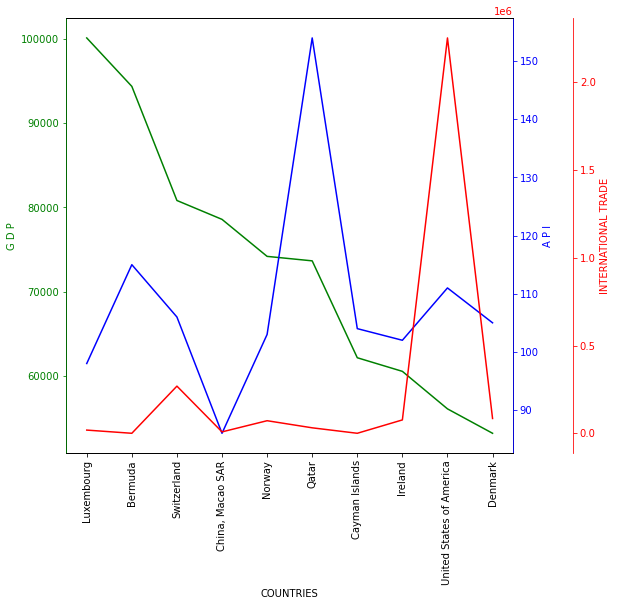

In [9]:
data2=data.sort_values(by='GDP per capita (current US$)',ascending=False).head(10)
fig,ax1= plt.subplots(figsize=(8,8))
x=data2['country']
y1=data2['GDP per capita (current US$)']
y2=data2['Agricultural production index ']
y3=data2['International trade: Imports (million US$)']
ax1.plot(x,y1, color='green')
plt.xticks(rotation=90)
ax2=ax1.twinx()
ax2.plot(x,y2,color='blue')
ax3=ax1.twinx()
plt.xticks(rotation=90)
ax3.plot(x,y3,color='red')
plt.xticks(rotation=90)
ax3.spines['right'].set_position(('outward',60))
ax1.set_ylabel('G D P',color='green')
ax2.set_ylabel('A P I',color='blue')
ax3.set_ylabel('INTERNATIONAL TRADE', color='red')
ax1.set_xlabel('COUNTRIES')
ax1.tick_params(axis='y',colors='green')
ax2.tick_params(axis='y',colors='blue')
ax3.tick_params(axis='y',colors='red')
ax2.spines['right'].set_color('blue')
ax3.spines['right'].set_color('red')
ax3.spines['left'].set_color('green')
plt.show()

# 3) Find out how many countries with respect to the region are available in the        dataset


In [10]:
data['Region'].value_counts()

WesternAsia          18
EasternAfrica        17
Caribbean            16
WesternAfrica        15
SouthAmerica         12
SouthernEurope       12
South-easternAsia    11
EasternEurope        10
NorthernEurope       10
SouthernAsia          9
MiddleAfrica          9
CentralAmerica        8
WesternEurope         7
EasternAsia           7
SouthernAfrica        5
Polynesia             5
NorthernAfrica        5
Melanesia             5
CentralAsia           5
NorthernAmerica       4
Micronesia            4
Oceania               2
Name: Region, dtype: int64

# 4 a) On average which region has the highest -  GDP Per Capita

In [11]:
highest_gdp=data.groupby('Region')['GDP per capita (current US$)'].mean()
print('The region with highest GDP is: ',highest_gdp.nlargest(1))

The region with highest GDP is:  Region
NorthernAmerica    57659.0
Name: GDP per capita (current US$), dtype: float64


# 4 b) On average which region has the highest -  International trade: Imports (million US$)

In [12]:
highest_import=data.groupby('Region')['International trade: Imports (million US$)'].mean()
print('The region with highest import trade is: ',highest_import.nlargest(1))

The region with highest import trade is:  Region
NorthernAmerica    663552.25
Name: International trade: Imports (million US$), dtype: float64


# 5) Find out which region has more consistent with respect to GDP per capita (current US$)

In [15]:
least_gdp_variation=data.groupby('Region')['GDP per capita (current US$)'].std().round(3)
least_gdp_variation.sort_values(ascending=True)

Region
WesternAfrica          815.095
NorthernAfrica         974.707
SouthernAfrica        2177.551
SouthernAsia          2855.708
EasternAfrica         3716.132
CentralAsia           4152.215
CentralAmerica        4180.441
SouthAmerica          4273.707
Micronesia            4820.670
MiddleAfrica          5274.846
EasternEurope         5415.489
Polynesia             6956.250
Oceania               9233.330
SouthernEurope        9541.703
Melanesia            13855.843
Caribbean            14579.371
South-easternAsia    16311.811
WesternAsia          18812.151
NorthernEurope       20671.030
WesternEurope        24770.468
NorthernAmerica      25749.619
EasternAsia          27485.121
Name: GDP per capita (current US$), dtype: float64

In [16]:
print('The region which is the most consistent with GDP is: ',least_gdp_variation.nsmallest(1))

The region which is the most consistent with GDP is:  Region
WesternAfrica    815.095
Name: GDP per capita (current US$), dtype: float64
